In [5]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [1]:
# Lets fetch the data!
from nilearn import datasets
data = datasets.fetch_development_fmri()

In [2]:
len(data.func)

155

In [7]:
data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [8]:
pheno = data.phenotypic

In [9]:
type(pheno)

numpy.ndarray

In [15]:
print(pheno)

[('sub-pixar123', 27.06      , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar124', 33.44      , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar125', 31.        , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar126', 19.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar127', 23.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar128', 27.        , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar129', 23.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar130', 21.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar131', 39.        , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar132', 22.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar133', 21.        , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar134', 25.        , 'Adult', 'adult', 'M', 'R')
 ('sub-pixar135', 21.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar136', 25.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar137', 34.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar138', 28.        , 'Adult', 'adult', 'F', 'R')
 ('sub-pixar139', 18.        , 'Adult', 'adult', 'F', 'R

In [20]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import datasets

#First, let's load a parcellation that we'd like to use
multiscale = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = multiscale.scale064

print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)

Atlas ROIs are located in nifti image (4D) at: /home/tjays/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz


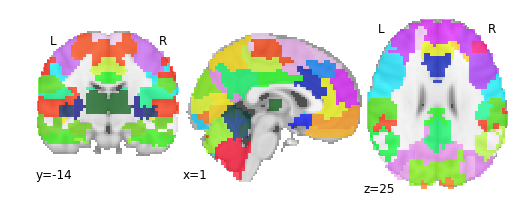

In [21]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

In [25]:
# initialize the masker from which we will retrieve a 2D array
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, 
                           memory='nilearn_cache', verbose=0)

In [126]:
# initialize correlation measure, to build a "connectome"
#set to vectorize (ready for our predictive model later on!)
vectorized_correlation_measure = ConnectivityMeasure(kind='correlation', discard_diagonal=True, vectorize=True)
nonvectorized_correlation_measure = ConnectivityMeasure(kind='correlation', discard_diagonal=True)

In [127]:
# example with one participant
sub = data.func[0]
conf = data.confounds[0]

# Extract brain signal while removing confounds
time_series = masker.fit_transform(sub, confounds=conf)

In [128]:
time_series.shape

(168, 64)

In [132]:
nonvectorized_correlation_matrix = nonvectorized_correlation_measure.fit_transform([time_series])[0]
vectorized_correlation_matrix = vectorized_correlation_measure.fit_transform([time_series])[0]
print('Nonvectorized Correlation Matrix.shape: {}'.format(nonvectorized_correlation_matrix.shape))
print('vectorized_correlation_matrix.shape: {}'.format(vectorized_correlation_matrix.shape))

Nonvectorized Correlation Matrix.shape: (64, 64)
vectorized_correlation_matrix.shape: (2016,)


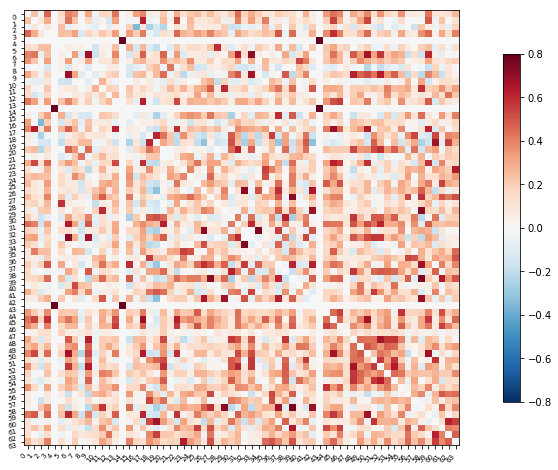

In [133]:
import numpy as np
# Mask the main diagonal for visualization:
np.fill_diagonal(nonvectorized_correlation_matrix, 0)

# The labels we have start with the background (0), hence we skip the
# first label  
plotting.plot_matrix(nonvectorized_correlation_matrix, figure=(10, 8),   
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False)

# matrices are ordered for block-like representation

In [134]:
all_features = [] # here is where we will put the data (a container)

for i,sub in enumerate(data.func):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(sub, confounds=data.confounds[i])
    # create a region x region correlation matrix
    vectorized_correlation_matrix = vectorized_correlation_measure.fit_transform([time_series])[0]
    # add to our container
    all_features.append(vectorized_correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(i+1,len(data.func)))

finished 1 of 155
finished 2 of 155
finished 3 of 155
finished 4 of 155
finished 5 of 155
finished 6 of 155
finished 7 of 155
finished 8 of 155
finished 9 of 155
finished 10 of 155
finished 11 of 155
finished 12 of 155
finished 13 of 155
finished 14 of 155
finished 15 of 155
finished 16 of 155
finished 17 of 155
finished 18 of 155
finished 19 of 155
finished 20 of 155
finished 21 of 155
finished 22 of 155
finished 23 of 155
finished 24 of 155
finished 25 of 155
finished 26 of 155
finished 27 of 155
finished 28 of 155
finished 29 of 155
finished 30 of 155
finished 31 of 155
finished 32 of 155
finished 33 of 155
finished 34 of 155
finished 35 of 155
finished 36 of 155
finished 37 of 155
finished 38 of 155
finished 39 of 155
finished 40 of 155
finished 41 of 155
finished 42 of 155
finished 43 of 155
finished 44 of 155
finished 45 of 155
finished 46 of 155
finished 47 of 155
finished 48 of 155
finished 49 of 155
finished 50 of 155
finished 51 of 155
finished 52 of 155
finished 53 of 155
fi

In [135]:
print(type(all_features))



<class 'list'>


In [136]:
# Let's save the data to disk
np.savez_compressed(os.path.join(os.curdir, 'MAIN_BASC064_subsamp_features'),a = all_features)

In [137]:
import os
import pathlib

#feat_file = os.path.join(pathlib.Path().absolute(), 'MAIN2019_BASC064_subsamp_features.npz')
feat_file = os.path.join(os.curdir, 'MAIN_BASC064_subsamp_features.npz')

X_features = np.load(feat_file)['a']

In [138]:
X_features.shape

(155, 2016)

In [139]:
X_features[0]

array([ 0.23286033, -0.04362468,  0.09200875, ...,  0.55168952,
        0.37868211,  0.4752018 ])

Text(0,0.5,'subject')

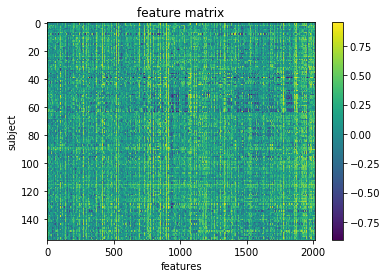

In [140]:
import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subject')

In [141]:
import pandas as pd

pheno = pandas.DataFrame(pheno)
pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness
0,sub-pixar123,27.06,Adult,adult,F,R
1,sub-pixar124,33.44,Adult,adult,M,R
2,sub-pixar125,31.00,Adult,adult,M,R
3,sub-pixar126,19.00,Adult,adult,F,R
4,sub-pixar127,23.00,Adult,adult,F,R


In [142]:
df_labels = pd.DataFrame(pheno['Gender'])
df_labels

,Gender
0,F
1,M
2,M
3,F
4,F
...,...
150,F
151,F
152,F
153,F


In [143]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_labels.values.ravel())
le.classes_
df_labels = pd.DataFrame(data=le.transform(df_labels.values.ravel()),columns=['Gender']) 
df_labels.head()

,Gender
0,0
1,1
2,1
3,0
4,0


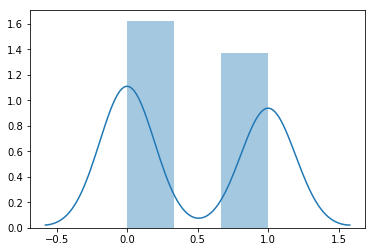

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_labels)

In [145]:

df_labels['Gender'].value_counts()

0    84
1    71
Name: Gender, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

# Split the sample to training/validation with a 60/40 ratio, and 
# stratify by age class, and also shuffle the data.

X_train, X_val, y_train, y_val = train_test_split(
                                                    X_features, # x
                                                    df_labels.values, # y
                                                    test_size = 0.30, # 70%/30% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    stratify = df_labels.values,  # keep
                                                                           # distribution
                                                                           # of ageclass
                                                                           # consistent
                                                                           # betw. train
                                                                           # & test sets.
                                                    random_state = 123 # same shuffle each
                                                                       # time
                                                                       )

# print the size of our training and test groups
print('training:', len(X_train),
     'testing:', len(X_val))

training: 108 testing: 47


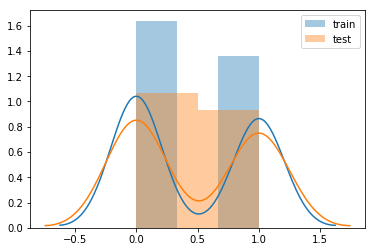

In [147]:
sns.distplot(y_train,label='train')
sns.distplot(y_val,label='test')
plt.legend()

In [149]:
from sklearn.svm import SVR
l_svr = SVR(kernel='linear') # define the model

l_svr.fit(X_train, y_train) # fit the model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)